# Mushroom Dataset

In [ ]:
%pip install kaggle --quiet
%pip install visualkeras --quiet

In [ ]:
import os
import subprocess
import zipfile
import pandas as pd
import keras
import numpy as np
import seaborn as sns
import visualkeras

from keras.utils import to_categorical
from keras.layers import Dense, Activation, InputLayer, Dropout, BatchNormalization
from keras.models import Sequential

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

### Importação do Dataset

In [ ]:
subprocess.run(["kaggle", "datasets", "download", "-d", "prishasawhney/mushroom-dataset"])
with zipfile.ZipFile("mushroom-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()
os.remove("mushroom-dataset.zip")
mushroom_dataset = pd.read_csv("mushroom_cleaned.csv")

### Tratamento dos Dados

#### Análise dos Dados

In [ ]:
mushroom_dataset.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [ ]:
mushroom_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [ ]:
mushroom_dataset.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


#### Separação de Features e Target

In [ ]:
features, target = mushroom_dataset.iloc[:, 0:8].values, mushroom_dataset.iloc[:, 8].values

In [ ]:
pd.DataFrame(features).head()

,0,1,2,3,4,5,6,7
0,1372.0,2.0,2.0,10.0,3.807467,1545.0,11.0,1.804273
1,1461.0,2.0,2.0,10.0,3.807467,1557.0,11.0,1.804273
2,1371.0,2.0,2.0,10.0,3.612496,1566.0,11.0,1.804273
3,1261.0,6.0,2.0,10.0,3.787572,1566.0,11.0,1.804273
4,1305.0,6.0,2.0,10.0,3.711971,1464.0,11.0,0.943195


#### Normalização das Features


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

#### One-hot Encoding

In [ ]:
target_categorical = to_categorical(target)
pd.DataFrame(target_categorical).head()

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


#### Divisão de Treino e Teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, target_categorical, test_size=0.20, random_state=1, shuffle=True)

print('Shape dados de treino:   %s'% (X_train.shape,))
print('Shape dados de teste:    %s'% (X_test.shape,))
print('Exemplo de entrada:      %s'% (X_train[0]))
print('Exemplo de saída:        %s'% (y_train[0]))

Shape dados de treino:   (43228, 8)
Shape dados de teste:    (10807, 8)
Exemplo de entrada:      [-0.52033172  0.92557232  1.28227912  0.83446694  0.11813824 -0.54099089
  0.79150827 -0.02934774]
Exemplo de saída:        [1. 0.]


### Rede Neural MLP

In [ ]:
model = Sequential([
    InputLayer(input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(16, activation='relu'),
    Dense(target_categorical.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
model.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_225 (Dense)           (None, 128)               1152      
                                                                 
 dense_226 (Dense)           (None, 64)                8256      
                                                                 
 dense_227 (Dense)           (None, 32)                2080      
                                                                 
 batch_normalization_15 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                                 
 dense_228 (Dense)           (None, 16)                528       
                                                                 
 dense_229 (Dense)           (None, 2)                 34        
                                                     

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
1351/1351 [==============================] - 4s 3ms/step - loss: 0.3219 - accuracy: 0.8583 - val_loss: 0.2316 - val_accuracy: 0.9066
Epoch 2/30
1351/1351 [==============================] - 3s 2ms/step - loss: 0.1623 - accuracy: 0.9378 - val_loss: 0.1094 - val_accuracy: 0.9585
Epoch 3/30
1351/1351 [==============================] - 3s 2ms/step - loss: 0.1198 - accuracy: 0.9558 - val_loss: 0.0881 - val_accuracy: 0.9656
Epoch 4/30
1351/1351 [==============================] - 3s 2ms/step - loss: 0.1001 - accuracy: 0.9633 - val_loss: 0.0698 - val_accuracy: 0.9716
Epoch 5/30
1351/1351 [==============================] - 3s 2ms/step - loss: 0.0859 - accuracy: 0.9682 - val_loss: 0.0946 - val_accuracy: 0.9652
Epoch 6/30
1351/1351 [==============================] - 3s 2ms/step - loss: 0.0800 - accuracy: 0.9703 - val_loss: 0.0541 - val_accuracy: 0.9799
Epoch 7/30
1351/1351 [==============================] - 3s 2ms/step - loss: 0.0727 - accuracy: 0.9726 - val_loss: 0.0786 - val_accuracy:

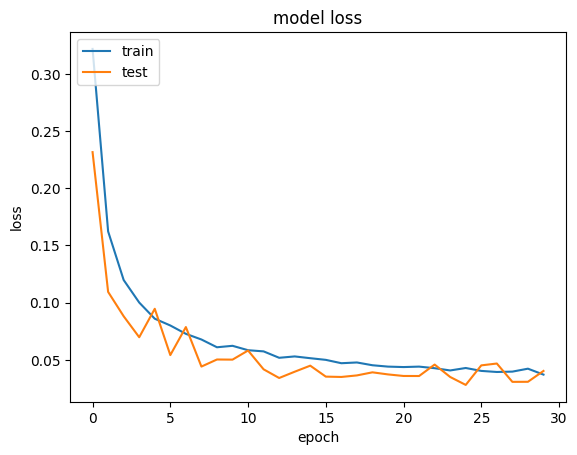

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

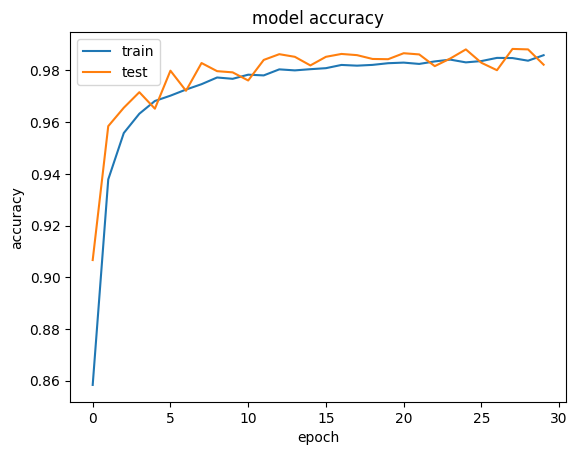

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
result = model.predict(x=X_test)

labels = np.array(result).argmax(axis=1)
predictions = np.array(y_test).argmax(axis=1)

print(classification_report(labels, predictions))

338/338 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4966
           1       0.98      0.99      0.98      5841

    accuracy                           0.98     10807
   macro avg       0.98      0.98      0.98     10807
weighted avg       0.98      0.98      0.98     10807



338/338 [==============================] - 0s 1ms/step


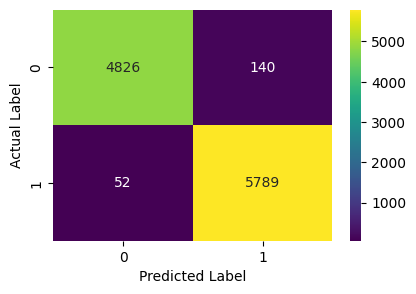

In [ ]:
result = model.predict(x=X_test)
labels = np.array(result).argmax(axis=1)
predictions = np.array(y_test).argmax(axis=1)
confusionmatrix = confusion_matrix(labels, predictions)
plt.figure(figsize=(4.5,3))
sns.heatmap(confusionmatrix,annot=True,fmt='d',cmap='viridis')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

### Resultados

**Rede 1**<br>
Arquitetura: 128, 64, 32, 16<br>
Dropout:<br>
Epochs: 30<br>
Batch Normalization: True<br>
Accuracy = 0.99<br>
<br>
<br>
**Rede 2**<br>
Arquitetura: 64, 32, 16, 8<br>
Dropout: 0.2<br>
Epochs: 20<br>
Batch Normalization: False<br>
Accuracy = 0.98<br>
<br>
<br>
**Rede 3**<br>
Arquitetura: 32, 20, 16, 8<br>
Dropout: <br>
Epochs: 30<br>
Batch Normalization: True<br>
Accuracy = 0.97<br>
<br>
<br>
**Rede 4**<br>
Arquitetura: 16, 32, 64, 128<br>
Dropout:<br>
Epochs: 30<br>
Batch Normalization: True<br>
Accuracy = 0.87<br>
<br>
<br>
**Rede 5**<br>
Arquitetura: 64, 32, 16, 8<br>
Dropout: 0.8<br>
Epochs: 20<br>
Batch Normalization: False<br>
Accuracy = 0.7<br>




### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("RandomForest Classifier Accuracy:", accuracy_rf)
print("RandomForest Classifier Classification Report:")
print(classification_report(y_test, y_pred_rf))

RandomForest Classifier Accuracy: 0.9906542056074766
RandomForest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4878
           1       0.99      0.99      0.99      5929

   micro avg       0.99      0.99      0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807
 samples avg       0.99      0.99      0.99     10807

